<a href="https://colab.research.google.com/github/pedro-varela1/projeto_controlsistems_unidade2/blob/main/Controle_UNII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Construção do trabalho da segunda unidade

Disciplina: Sistemas de Controle II

Docente: Gabriel

Discentes:

           Douglas Wilian;
           Gutembergue Ferreira;
           Jeffet Matheus;
           Pedro Artur;
           Roger José


##MODELAGEM

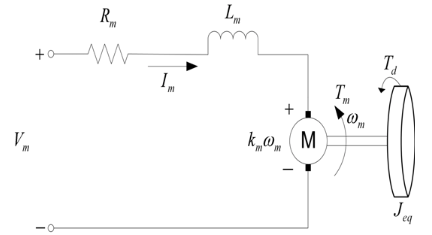

Podemos realizar a modelagem do motor, percorrendo a malha do circuito:

$v_m(t) - R_m \cdot i_m(t) - L\dfrac{di_m(t)}{dt} - k_m\omega_m =0 \implies k_m\omega_m = v_m - R_m \cdot I_m - L\dfrac{di_m(t)}{dt}$

Sabemos que $i_m(t)$ é dado por: $\tau(t) = k_m i_m(t)$, assim como $\dot{\tau}(t) = k_m\dot{i}(t)$

Substituindo na primeira equação, obtemos:

$v_m(t) = R_m\dfrac{\tau(t)}{k_m} + \dfrac{L}{k_m}\dot{\tau}(t) + k_m\omega_m$

O torque é dado por:

$\tau(t) = J_{eq}\dot{\omega}_m + b\omega_m$

Como sabemos que $b = \dfrac{J_m}{\tau_m}$, podemos fazer:

$v_m(t) = \dfrac{R_m}{k_m}\left[J_{eq}\dot{\omega}_m(t) + \dfrac{J_m}{\tau_m}\omega_m(t)\right] + \dfrac{L}{k_m}\left[J_{eq}\ddot{\omega}_m(t) + \dfrac{J_m}{\tau_m}\dot{\omega}_m(t)\right] + k_m\omega_m(t)$

---
Obtendo como expressão algébrica a seguinte equação diferencial:

$v_m(t) = \dfrac{L J_{eq}}{k_m}\ddot{\omega}_m(t) + \left[\dfrac{R_mJ_{eq}}{k_m}+ \dfrac{J_mL}{k_m\tau_m}\right]\dot{\omega}_m(t) + \left[\dfrac{R_mJ_m}{k_m\tau_m} + k_m\right] \omega_m(t)$

Como $J_{eq} = J_m + \dfrac{M_1r_1^2}{2}$, podemos fazer:

$v_m(t) = \dfrac{L}{k_m}\left(J_m + \dfrac{M_1r_1^2}{2}\right)\ddot{\omega}_m(t) + \left[\dfrac{R_m}{k_m}\left(J_m + \dfrac{M_1r_1^2}{2}\right)+ \dfrac{J_mL}{k_m\tau_m}\right]\dot{\omega}_m(t) + \left(\dfrac{R_mJ_m}{k_m\tau_m} + k_m\right) \omega_m(t)$

---

$v_m(t) = (3,6053\times10^{-7})\ddot{\omega}_m(t) + (4,6643\times10^{-3})\dot{\omega}_m(t) + (9,9188\times10^{-2})\omega(t)$

Assim, aplicando Laplace dos dois lados da equação:

$V_m(s) = (3,6053\times10^{-7})s^2 W(s) + (4,6643\times10^{-3})sW(s) + (9,9188\times10^{-2})W(s)$

$V_m(s) = W(s)[(3,6053\times10^{-7})s^2 + (4,6643\times10^{-3})s + (9,9188\times10^{-2})]$

Logo, a função de transferência do sistema será:

\begin{align*}
G(s) = \dfrac{W(s)}{V_m(s)} = \dfrac{1}{(3,6053\times10^{-7})s^2 + (4,6643\times10^{-3})s + 9,9188\times10^{-2}} = \dfrac{2,7737 \times 10^6}{(s+21,3)(s+12916,04)}
\end{align*}

---

O erro em regime do sistema será dado por:
\begin{align*}
e(∞) = 0,099187
\end{align*}

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


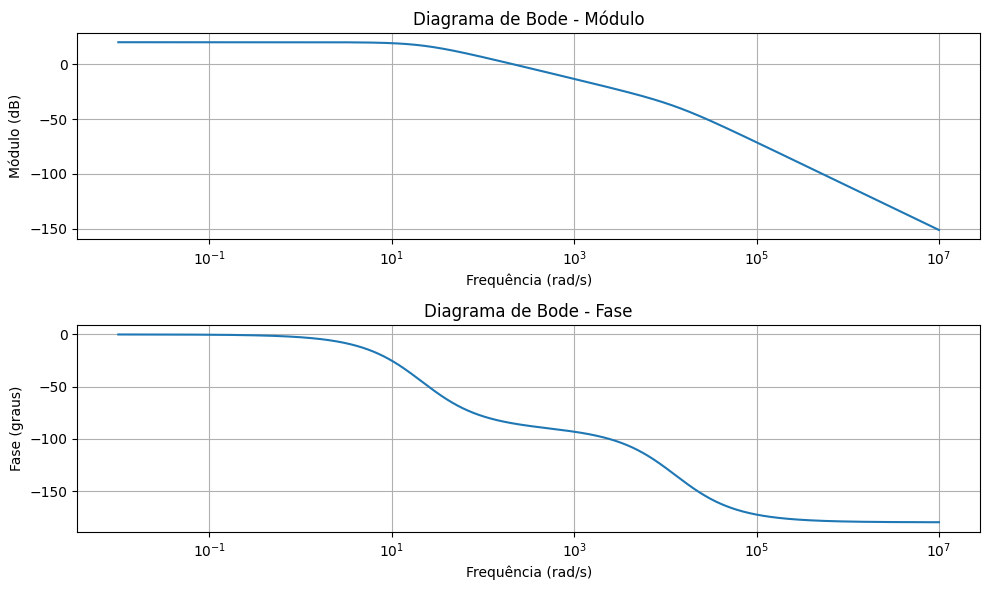

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Defina a função de transferência G(s)
numerator = [0,0,1]  # Numerador da função de transferência
denominator = [3.6053e-7, 4.6643e-3, 9.9188e-2]  # Denominador da função de transferência

# Crie um sistema de controle a partir da função de transferência
system = signal.TransferFunction(numerator, denominator)

# Frequências para o gráfico de Bode
omega = np.logspace(-2, 7, 100000)  # Faixa de frequências de 0.01 a 100

# Calcule a resposta em frequência
frequencies, magnitude, phase = signal.bode(system, omega)

# Plote o diagrama de Bode de módulo
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitude)
plt.grid()
plt.title('Diagrama de Bode - Módulo')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Módulo (dB)')

# Plote o diagrama de Bode de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase)
plt.grid()
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')

plt.tight_layout()
plt.savefig('Diagrama de Bode.png', dpi=500)
plt.show()


In [ ]:
for i in range(len(frequencies)):
  if frequencies[i] == frequencies[np.argmax(magnitude<=0)]:
    MF = 180 + phase[i]
    print(f'O Ganho de fase é de {MF}°')
    f = frequencies[i]
    m = magnitude[i]
    p = phase[i]

count = 0
for i in range(len(frequencies)):
  if abs(phase[i]) == 180:
    GM = 0 + magnitude[i]
    print(f'O ganho de magnitude é de {GM} dB')
    count += 1
if count == 0:
  print('GM infinito')



O Ganho de fase é de 94.74485986501682°
GM infinito


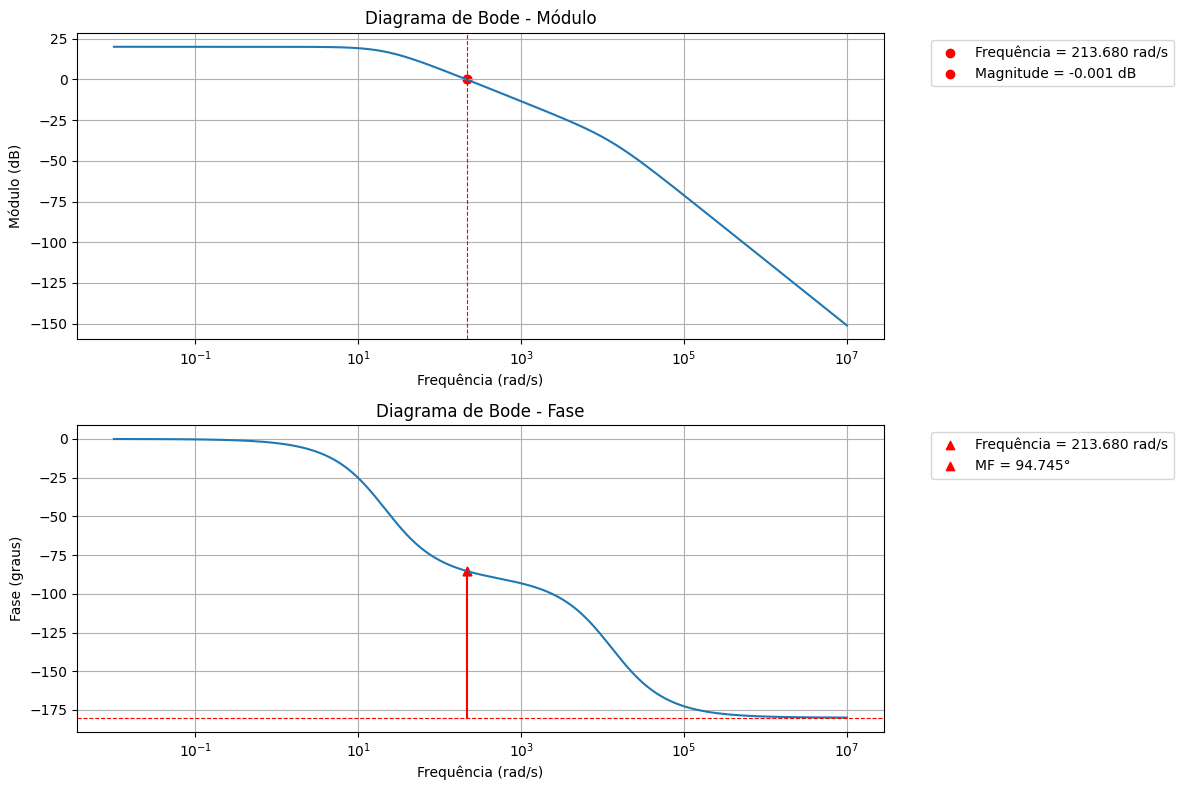

In [ ]:
# Plote o diagrama de Bode de módulo
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitude)
plt.grid()
plt.scatter(f,m, color='red', label=f'Frequência = {f:.3f} rad/s')
plt.scatter(f,m, color='red', label=f'Magnitude = {m:.3f} dB')
plt.axvline(x=f, color='red', linestyle='--', lw=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Diagrama de Bode - Módulo')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Módulo (dB)')

# Plote o diagrama de Bode de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase)
plt.grid()
plt.scatter(f,p, marker='^', color='red', label=f'Frequência = {f:.3f} rad/s')
plt.scatter(f,p, marker ='^', color='red', label=f'MF = {MF:.3f}°')
plt.plot([f, f], [p, -180], color='red', linestyle = 'solid')
plt.axhline(y=-180, color='red', linestyle='--', lw=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')

plt.tight_layout()
plt.savefig('Margem.png', dpi = 500)
plt.show()

A planta do PID é dada por:

$G_c(s) = \dfrac{\frac{K_C}{4T_D}\left(2T_Ds + 1\right)^2}{s}$

$∠(G_c(j\omega_{cg})) = \phi_f - \phi_i \implies 2\tan^{-1}(2T_D ω_{cg}) - 90° = \phi_f - \phi_i$

Logo, temos:

$2\tan^{-1}(2T_D ω_{cg}) = 100 - 94,745 + 90 \implies \tan^{-1}(2T_D ω_{cg}) = 47,6275$

$2T_D\omega_{cg} = 1,0962 \implies T_D = 0,002565 $

Para encontrar o valor de $K_C$, fazemos:

$|G_C(s)||G_p(s)| = 1 \implies K_C = 0,995796 \cdot 1,0001 \implies K_C = 0,9959$

Assim, temos:

$G_C(s) = \dfrac{0,0025445s^2 + 0,993959s + 97,06628}{s}$

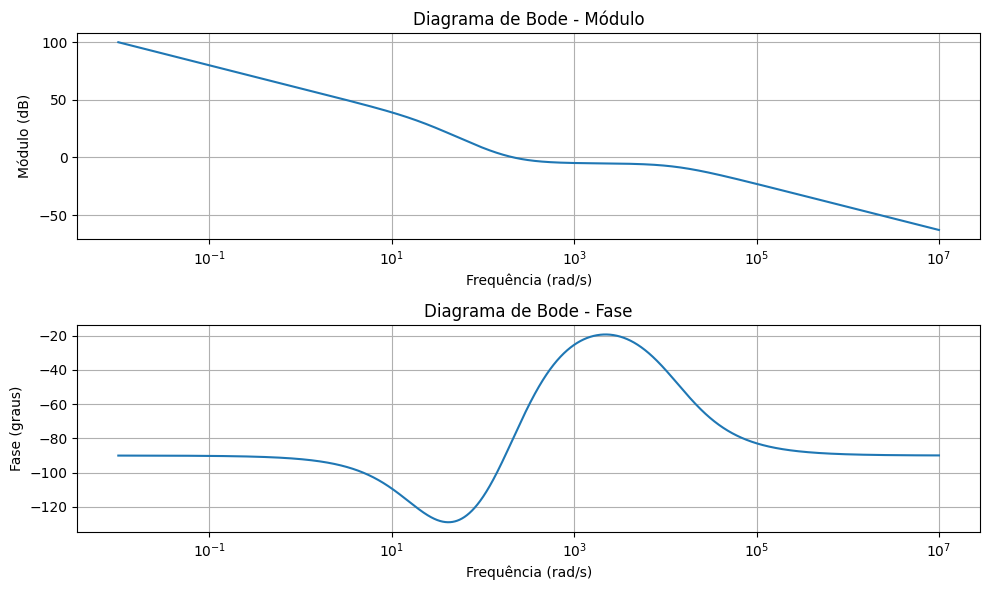

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Defina a função de transferência G(s)
numeratorgc = [0.002565, 1, 97.4658]  # Numerador da função de transferência
denominatorgc = [3.6053e-7, 4.6643e-3, 9.9188e-2, 0]  # Denominador da função de transferência

# Crie um sistema de controle a partir da função de transferência
systemgc = signal.TransferFunction(numeratorgc, denominatorgc)

# Frequências para o gráfico de Bode
omegagc = np.logspace(-2, 7, 100000)  # Faixa de frequências de 0.01 a 100

# Calcule a resposta em frequência
frequenciesgc, magnitudegc, phasegc = signal.bode(systemgc, omegagc)

# Plote o diagrama de Bode de módulo
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(frequenciesgc, magnitudegc)
plt.grid()
plt.title('Diagrama de Bode - Módulo')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Módulo (dB)')

# Plote o diagrama de Bode de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequenciesgc, phasegc)
plt.grid()
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')


plt.savefig('Diagrama controlado.png', dpi = 500)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(frequenciesgc)):
  if frequenciesgc[i] == frequenciesgc[np.argmax(magnitudegc<=0)]:
    MFgc = 180 + phasegc[i]
    print(f'O Ganho de fase é de {MFgc}°')
    fgc = frequenciesgc[i]
    mgc = magnitudegc[i]
    pgc = phasegc[i]

count = 0
for i in range(len(frequenciesgc)):
  if abs(phasegc[i]) == 180:
    GMgc = 0 + magnitudegc[i]
    print(f'O ganho de magnitude é de {GMgc} dB')
    count += 1
if count == 0:
  print('GM infinito')

O Ganho de fase é de 100.23936312855025°
GM infinito


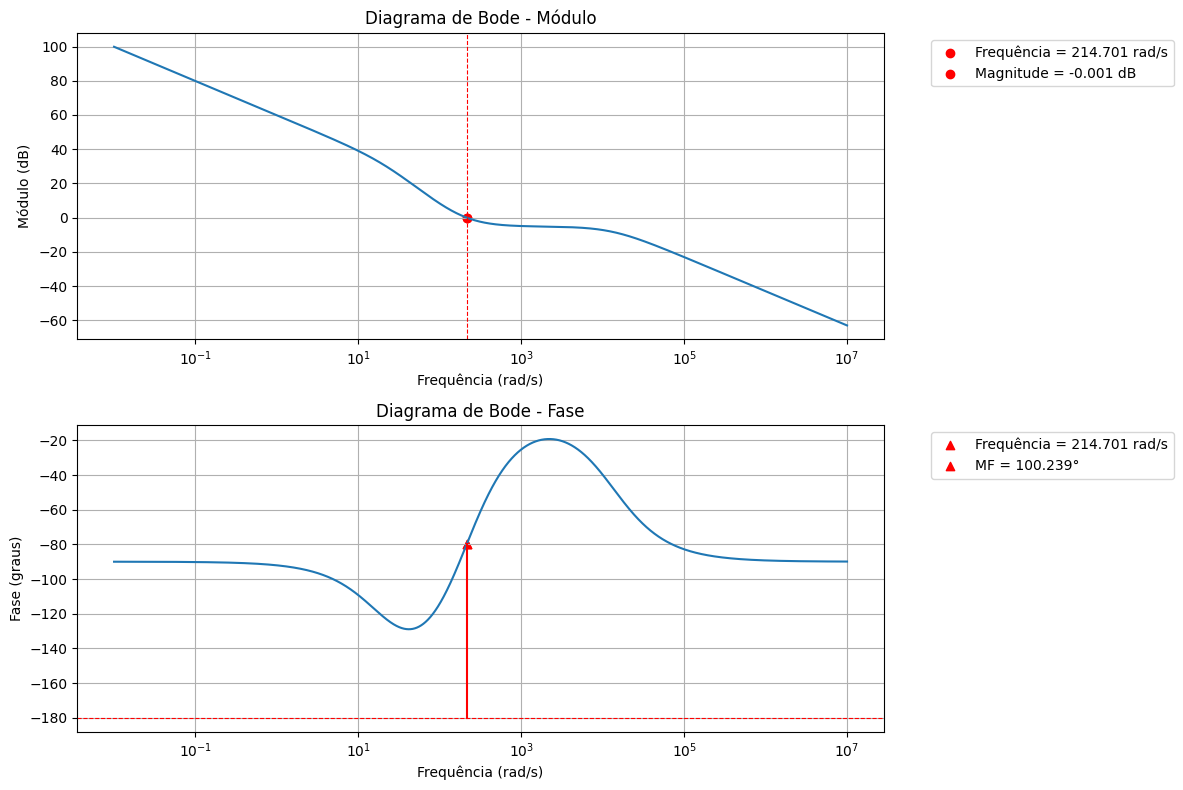

In [ ]:
# Plote o diagrama de Bode de módulo
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.semilogx(frequenciesgc, magnitudegc)
plt.grid()
plt.scatter(fgc,mgc, color='red', label=f'Frequência = {fgc:.3f} rad/s')
plt.scatter(fgc,mgc, color='red', label=f'Magnitude = {mgc:.3f} dB')
plt.axvline(x=fgc, color='red', linestyle='--', lw=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Diagrama de Bode - Módulo')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Módulo (dB)')

# Plote o diagrama de Bode de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequenciesgc, phasegc)
plt.grid()
plt.scatter(fgc,pgc, marker='^', color='red', label=f'Frequência = {fgc:.3f} rad/s')
plt.scatter(fgc,pgc, marker ='^', color='red', label=f'MF = {MFgc:.3f}°')
plt.plot([fgc, fgc], [pgc, -180], color='red', linestyle = 'solid')
plt.axhline(y=-180, color='red', linestyle='--', lw=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')

plt.tight_layout()
plt.savefig('MargemAT.png', dpi = 500)
plt.show()

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

def plot_response(numGpd=[0.212657], denGpd=[1, 0.02917], numGc=[8], denGc=[1], T_sim=20, REFERENCE=150):
  # Modelo da planta
  sysGpd = ctl.tf(numGpd, denGpd)
  sysGc = ctl.tf(numGc, denGc)

  # Modelo da realimentação unitária
  sysR = ctl.tf([1], [1])

  # Feedback sem o controlador
  sysFBs = ctl.feedback(sysGpd, sysR)
  print('G_malhaFechada_semGp = ', sysFBs)

  #Com controlador
  sysFBc = ctl.feedback(sysGc, sysR)

  tx = np.linspace(0, T_sim, 1000)  # Pontos da simulação
  u = REFERENCE * np.ones_like(tx)  # Referencia constante de 15cm

  t, h = ctl.forced_response(sysFBs, tx, u)
  plt.plot(t, h, color='black', linestyle = 'dashdot', label='Sem controlador')
  ### Plotagem da resposta à entrada de tensão com a realimentação e sem o controlador


  ### Plotagem da resposta à entrada de tensão com o controlador
  t, h = ctl.forced_response(sysFBc, tx, u)


  plt.plot(t, h, color='black', label=f'Com controlador')

  #### Eixos do gráfico
  plt.xlabel('t (segundos)')
  plt.ylabel('w (rad/s)')
  plt.title(f'Resposta à referência de {REFERENCE} rad/s')

  ESTAB = 150
  plt.axhline(y=ESTAB, color='red', linestyle='--', lw=0.5)

  #### Plotagem do gráfico
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.grid(linewidth=1)
  plt.savefig('Resposta_a_referencia.png', dpi = 600)
  plt.show()



G_malhaFechada_semGp =  
                1
----------------------------------
3.605e-07 s^2 + 0.004664 s + 1.099



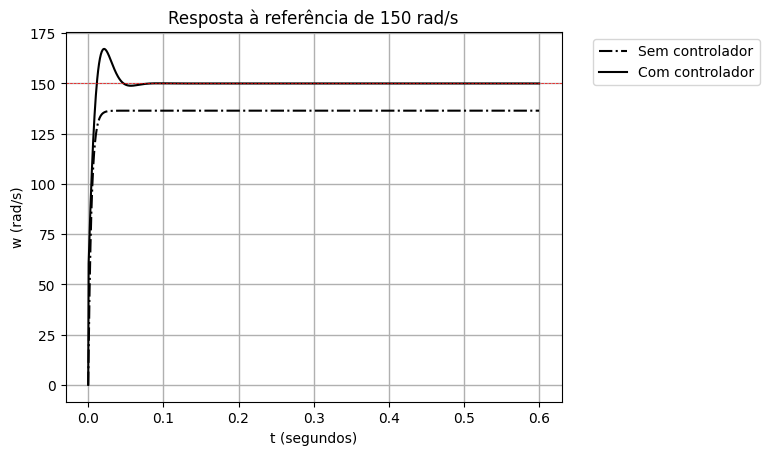

In [ ]:
numerator = [0,0,1]  # Numerador da função de transferência
denominator = [3.6053e-7, 4.6643e-3, 9.9188e-2]  # Denominador da função de transferência

# Defina a função de transferência G(s)
numeratorgc = [0.002565, 1, 97.4658]  # Numerador da função de transferência
denominatorgc = [3.6053e-7, 4.6643e-3, 9.9188e-2, 0]  # Denominador da função de transferência
plot_response(numGpd = numerator, denGpd = denominator, numGc = numeratorgc, denGc=denominatorgc, T_sim = 0.6)

###CENÁRIO 2

$v_m(t) = (3,6053\times10^{-7})\ddot{\omega}_m(t) + (4,6643\times10^{-3})\dot{\omega}_m(t) + (9,9188\times10^{-2})\omega(t)$

Como $\omega_m(t) = \dot{\theta}_m(t)$, temos:

$v_m(t) = (3,6053\times10^{-7})\dddot{\theta}_m(t) + (4,6643\times10^{-3})\ddot{\theta}_m(t) + (9,9188\times10^{-2})\dot{\theta}_m(t)$

Logo, temos:

\begin{align*}
 G_p(s) = \dfrac{\Theta(s)}{V_m(s)} = \dfrac{1}{(3,6053\times10^{-7})s^3 + (4,6643\times10^{-3})s^2 + (9,9188\times10^{-2})s}
\end{align*}

\begin{align*}
 G_p(s) = \dfrac{1}{s[(3,6053\times10^{-7})s^2 + (4,6643\times10^{-3})s + (9,9188\times10^{-2})]}
\end{align*}

\begin{align*}
G_p(s)  = \dfrac{2,7737 \times 10^6}{s(s+21,3)(s+12916,04)}
\end{align*}

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


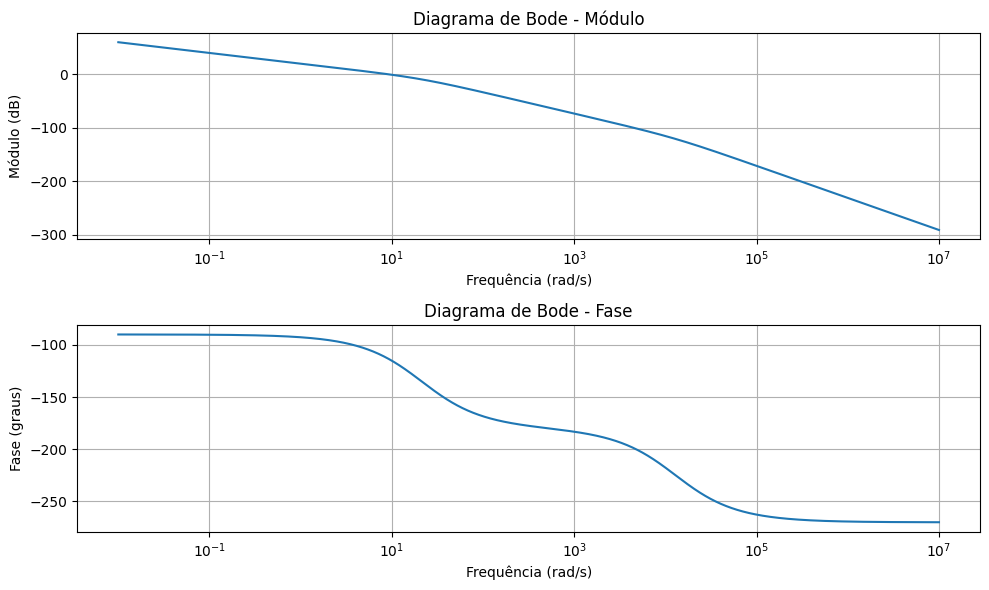

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Defina a função de transferência G(s)
numerator = [0,0,1]  # Numerador da função de transferência
denominator = [3.6053e-7, 4.6643e-3, 9.9188e-2, 0]  # Denominador da função de transferência

# Crie um sistema de controle a partir da função de transferência
system = signal.TransferFunction(numerator, denominator)

# Frequências para o gráfico de Bode
omega = np.logspace(-2, 7, 100000)  # Faixa de frequências de 0.01 a 100

# Calcule a resposta em frequência
frequencies, magnitude, phase = signal.bode(system, omega)

# Plote o diagrama de Bode de módulo
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitude)
plt.grid()
plt.title('Diagrama de Bode - Módulo')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Módulo (dB)')

# Plote o diagrama de Bode de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase)
plt.grid()
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')

plt.tight_layout()
plt.savefig('Diagrama de BodeC2.png', dpi=500)
plt.show()


In [ ]:
for i in range(len(frequencies)):
  if frequencies[i] == frequencies[np.argmax(magnitude<=0)]:
    MF = 180 + phase[i]
    print(f'O Ganho de fase é de {MF:.4f}°')
    f = frequencies[i]
    m = magnitude[i]
    p = phase[i]

count = 0
for j in range(len(frequencies)):
  if frequencies[j] == frequencies[np.argmax(abs(phase) >=180)]:
    GM = 0 - magnitude[j]
    p2 = phase[j]
    f2 = frequencies[j]
    m2 = magnitude[j]
    print(f'O ganho de magnitude é de {GM:.4f} dB')
    count += 1
if count == 0:
  print('GM infinito')



O Ganho de fase é de 66.4889°
O ganho de magnitude é de 62.1688 dB


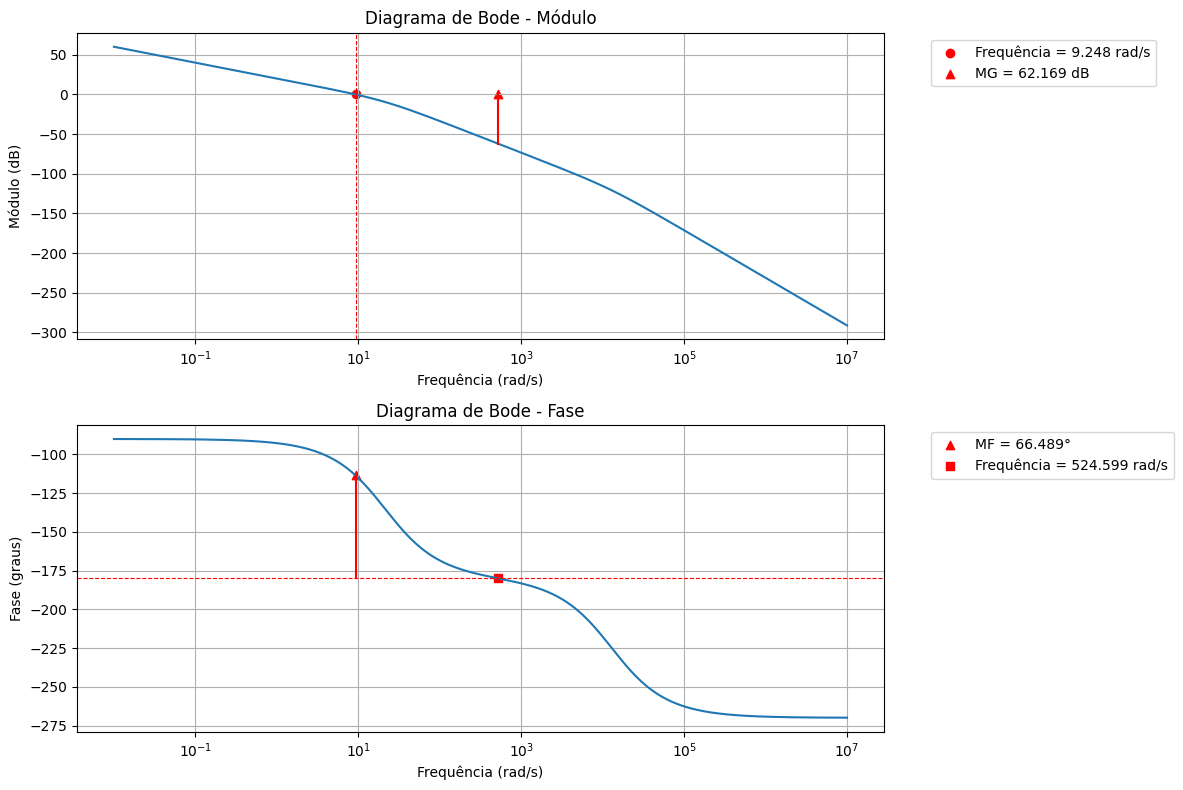

In [ ]:
# Plote o diagrama de Bode de módulo
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitude)
plt.grid()
plt.scatter(f,m, color='red', label = f'Frequência = {f:.3f} rad/s')
plt.plot([f2, f2], [0, m2], color='red', linestyle = 'solid')
plt.scatter(f2,0, color='red', marker='^', label=f'MG = {GM:.3f} dB')
plt.axvline(x=f, color='red', linestyle='--', lw=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Diagrama de Bode - Módulo')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Módulo (dB)')

# Plote o diagrama de Bode de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase)
plt.grid()
plt.scatter(f,p, marker ='^', color='red', label=f'MF = {MF:.3f}°')
plt.scatter(f2, p2, marker = 's', color='red', label = f'Frequência = {f2:.3f} rad/s')
plt.plot([f, f], [p, -180], color='red', linestyle = 'solid')
plt.axhline(y=-180, color='red', linestyle='--', lw=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Diagrama de Bode - Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')

plt.tight_layout()
plt.savefig('Margem.png', dpi = 500)
plt.show()

In [ ]:
!pip install control

import numpy as np
import matplotlib.pyplot as plt
import control as ctl

def plot_response(numGpd=[0.212657], denGpd=[1, 0.02917], T_sim=0.6, REFERENCE=1):
  # Modelo da planta
  sysGpd = ctl.tf(numGpd, denGpd)

  # Modelo da realimentação unitária
  sysR = ctl.tf([1], [1])

  # Feedback sem o controlador
  sysFBs = ctl.feedback(sysGpd, sysR)
  print('G_malhaFechada_semGp = ', sysFBs)

  tx = np.linspace(0, T_sim, 1000)  # Pontos da simulação
  u = REFERENCE * np.ones_like(tx)  # Referencia constante de 15cm

  t, h = ctl.forced_response(sysFBs, tx, u)
  plt.figure(figsize=(12,8))
  plt.plot(t, h, color='black', linestyle = 'solid', label='Realimentação Unitária')
  ### Plotagem da resposta à entrada de tensão com a realimentação e sem o controlador

  #### Eixos do gráfico
  plt.xlabel('t (segundos)')
  plt.ylabel('Posição (rad)')
  plt.title(f'Resposta da planta com realimentação unitária à referência de {REFERENCE} rad')

  ESTAB = 1
  plt.axhline(y=ESTAB, color='red', linestyle='--', lw=0.5)

  #### Plotagem do gráfico
  plt.grid(linewidth=1)
  plt.savefig('Resposta_a_referencia2.png', dpi = 500)
  plt.show()

G_malhaFechada_semGp =  
                     1
--------------------------------------------
3.605e-07 s^3 + 0.004664 s^2 + 0.09919 s + 1



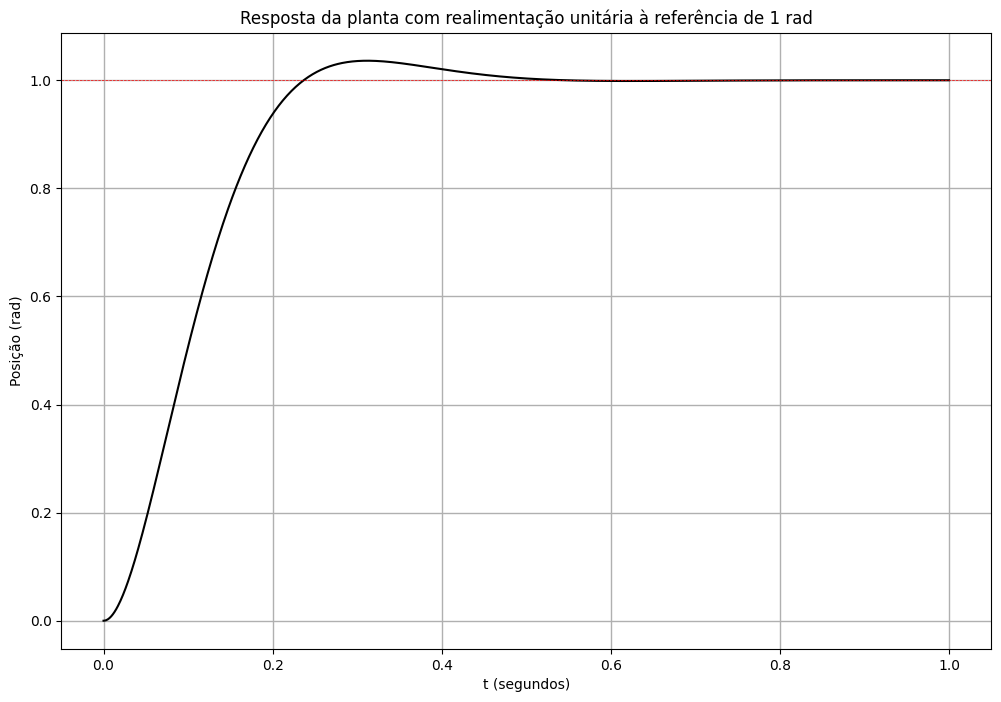

In [ ]:
numerator = [0,0,1]  # Numerador da função de transferência
denominator = [3.6053e-7, 4.6643e-3, 9.9188e-2, 0]  # Denominador da função de transferência

plot_response(numGpd = numerator, denGpd = denominator, T_sim = 1)